Linear Regression Project ( Ecommerce Clients)





  24/9/2024  First project

The dataset
 includes information about customers of an e-commerce website, including the following:

 -Avg. Session Length: Average session of in-store style advice sessions.

-Time on App: Average time spent on App in minutes

-Time on Website: Average time spent on Website in minutes.

-Length of Membership: How many years the customer has been a member.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import math

***Import the data***


In [ ]:
# Load the dataset

path= '/Ecommerce Customers.txt'
customers = pd.read_csv(path)

#view some data from the dataset
customers.head()
#to know the null data on the dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


***Exploratory Data Analysis***

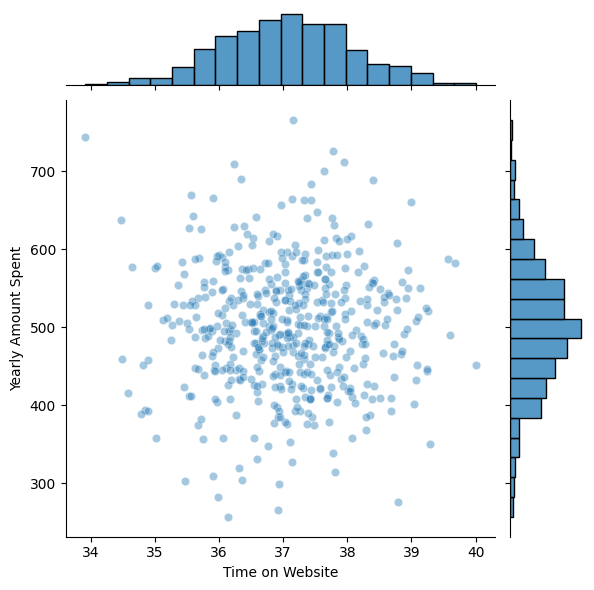

In [ ]:
# time on website vs yearly amount spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, alpha=0.4)

The second graph shows that there seems to be a small correlation between the time spent on the app and the yearly spending. This is probably because these clients tend to spend less time browsing on the phone.

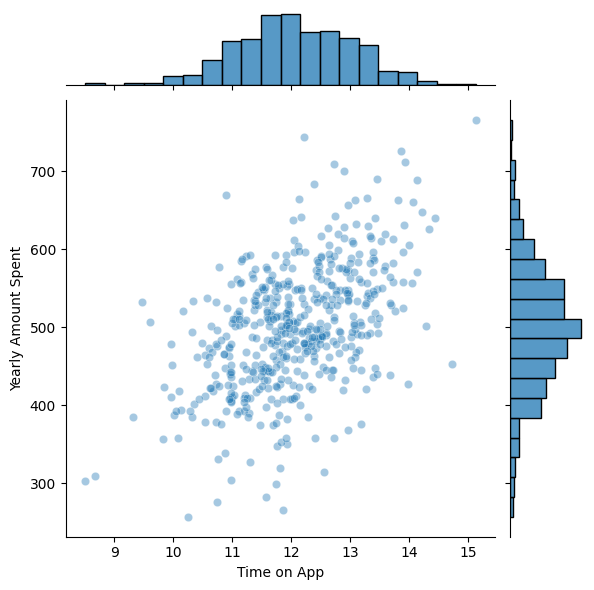

In [ ]:
# time on app vs yearly amount spent
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, alpha=0.4)

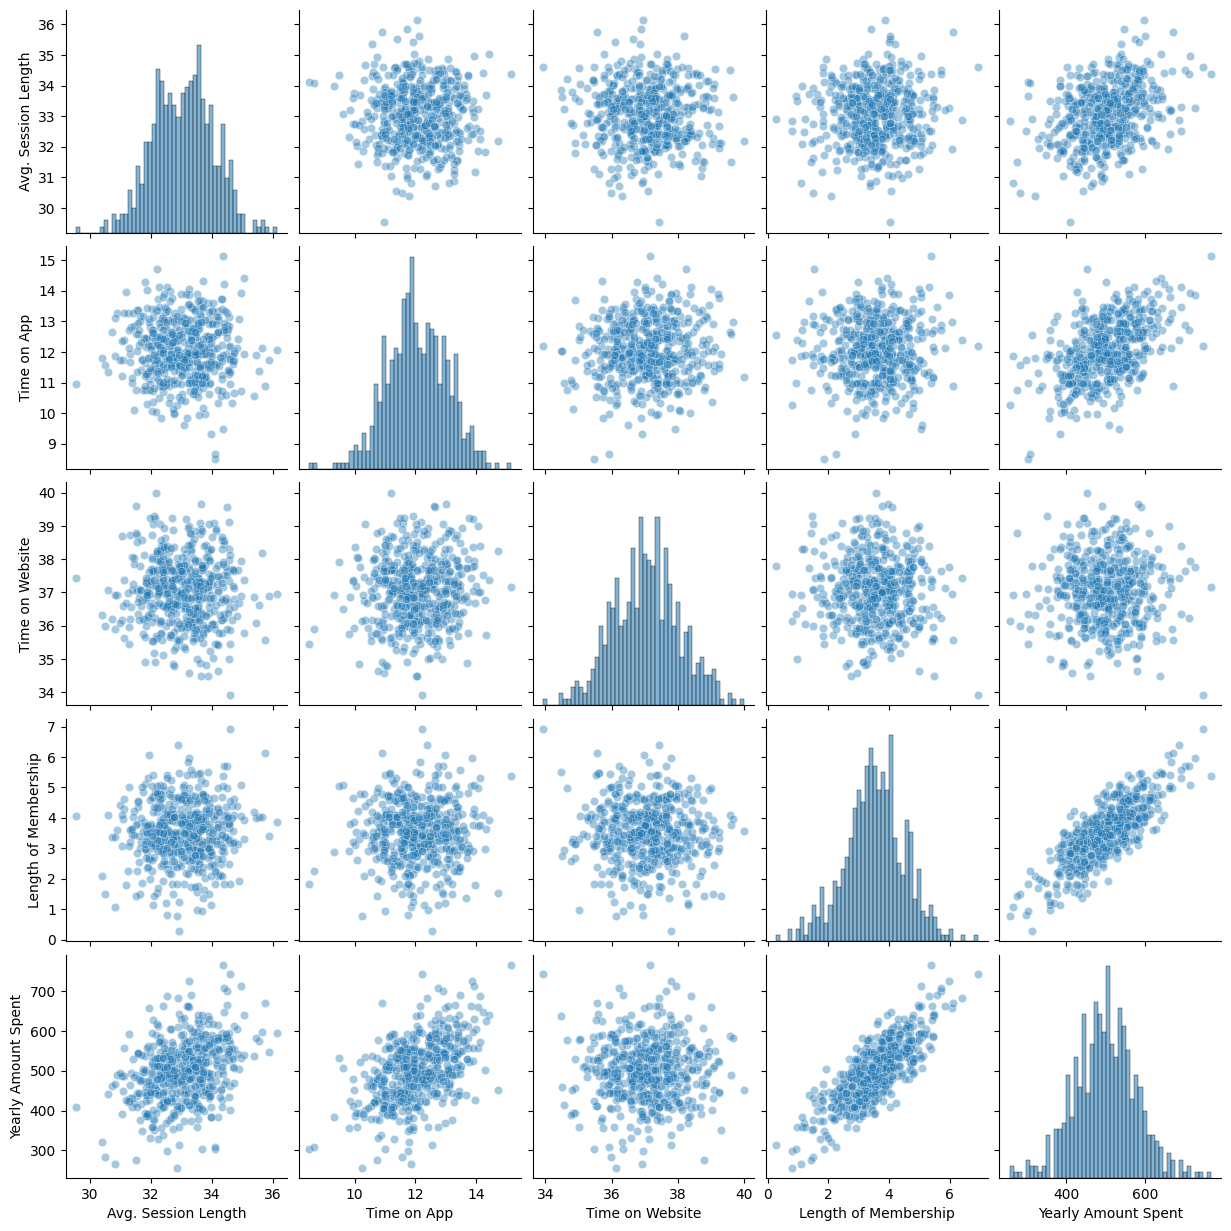

In [ ]:
sns.pairplot(customers,
             kind='scatter',
             plot_kws={'alpha':0.4},
             diag_kws={'alpha':0.55, 'bins':50})

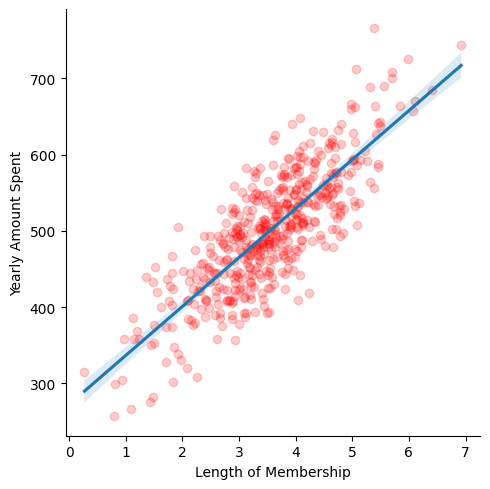

In [ ]:
# length of membership vs yearly amount spent
sns.lmplot(x='Length of Membership',
y='Yearly Amount Spent',
           data=customers,
           scatter_kws={'alpha':0.2,'color': 'red'})

After analyzing the pair plot, we see that there appears to be a large positive correlation between two variables: length of membership and annual expenses. Finally, we recalculate this plot to visualize the regression line.


***Splitting the data***

In [ ]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30)
X.head()
y.head()

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


***Training the Model with multivariable regression using Scikit Learn***

In [ ]:
module = LinearRegression()
#fit the module
module.fit(X_train, y_train)
LinearRegression()

# the coefficients
module.coef_

# r squared
module.score(X, y)

# The coefficients in a dataframe
cdf = pd.DataFrame(module.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.577830
Time on App           38.282016
Time on Website        0.682888
Length of Membership  61.475898


***Training the model with multivariable regression using OLS***

In [ ]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     5533.
Date:                 Tue, 24 Sep 2024   Prob (F-statistic):          2.12e-311
Time:                         21:22:51   Log-Likelihood:                -1314.5
No. Observations:                  350   AIC:                             2639.
Df Residuals:                      345   BIC:                             2658.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

***Predicting Test Data***

Now that the model is trained, we should be able to use it to make our predictions and evaluate our model


In [ ]:

predictions = module.predict(X_test)

The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.

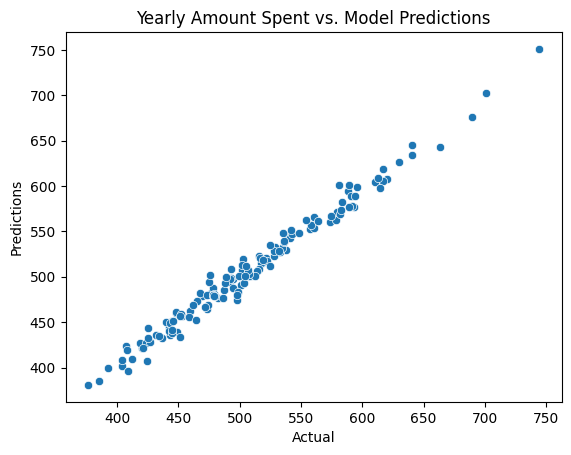

In [ ]:
# Assuming y_test and predictions are arrays or lists, convert them to DataFrame
data = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

sns.scatterplot(x='Actual', y='Predicted', data=data)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')
plt.show()


Evaluation of the model


In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 7.133179121588148
Mean Squared Error: 79.34389857659842
Root Mean Squared Error: 8.907519215617691


***Residuals***


Distribution plot of the residuals of the model's predictions. They should be normally distributed.

<ipython-input-18-b87d825c292e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

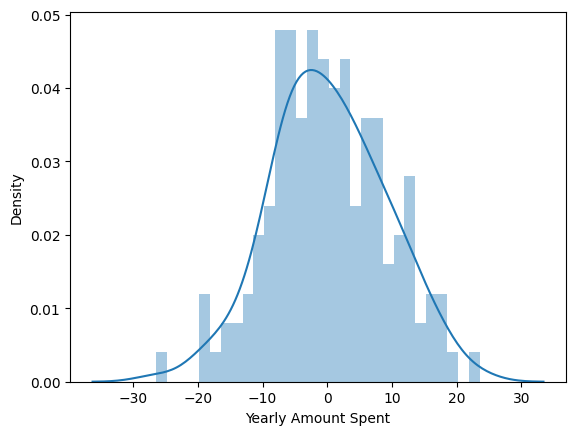

In [ ]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

According to the data, the amount of time that the customer spends on the desktop website has almost nothing to do with the amount of money they will spend.